In [1]:
import numpy as np
import pandas  as pd
import torch

from underthesea import word_tokenize

# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# # load dataset
# tips = sns.load_dataset("tips")

# # set plot style: grey grid in the background:
# sns.set(style="darkgrid")

# # set the figure size
# plt.figure(figsize=(14, 14))

# # top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
# total = tips.groupby('day')['total_bill'].sum().reset_index()

# # bar chart 1 -> top bars (group of 'smoker=No')
# bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

# # bottom bar ->  take only smoker=Yes values from the data
# smoker = tips[tips.smoker=='Yes']

# # bar chart 2 -> bottom bars (group of 'smoker=Yes')
# bar2 = sns.barplot(x="day", y="total_bill", data=smoker, estimator=sum, ci=None,  color='lightblue')

# # add legend
# top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
# bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
# plt.legend(handles=[top_bar, bottom_bar])

# # show the graph
# plt.show()

In [2]:
sen_ = {
    "sentence": ["$subject $command $appt $dr $person_name lúc $time ngày $date",
                "$subject $command $appt $dr $person_name vào $date lúc $time",  
                "$subject $command $appt $dr $person_name vào $date $time",
                "$command $appt với $person_name vào $date",
                "$command $appt với $person_name",
                "$greet $subject $command $appt",
                "$subject $command_v2 cho $person_name với $person_name",
                "$greet $subject $command_v2 $appt vào $time $date",
                "$time $date $subject $command với $person_name",
                "$subject có một vài triệu chứng $symptom , tôi $command với $hospital_name",
                "$subject có $appt với $person_name",
                "vào $date có $appt với $hospital_name",
                "vào $time có $appt với $person_name",
                "$command_v2 với $person_name ở $hospital_name",
                "$greet $subject có $appt với $person_name , hiện tại có $symptom",
                "$command $appt với $dr $person_name vào $time ạ",
                "$command_v2 $appt như thế nào",
                "$command_v2 $appt thì như nào",
                "$command $appt với $person_name thì như nào",
                "$subject $command_v2 $appt tại $hospital_name vào $date thì làm sao",
                "$command $appt với $person_name ở $department tại $hospital_name",
                "$person_name là tên $subject $command $appt nay $symptom",
                "$person_name là tên của bạn $subject $command_v2 với $person_name ở $department",
                "tên của tui là $person_name nay tui $command $appt",
                "tôi biết $person_name khá giỏi, tôi có $symptom , tôi $command $appt",
                "$command với $person_name $time $date",
                "$command với $person_name $date $time",
                "$greet $command $person_name $time $date",
                "$command $person_name $date ở $department cảm ơn",
                "tôi tên $person_name giờ tôi $command $appt",
                "$hospital_name có $dr $person_name , tôi $command",
                "vài ngày qua tôi $symptom , tôi $command với $person_name",
                "tôi có dấu hiệu $symptom tôi $command $appt vào $date",
                "tôi thấy ở $hospital_name có điều trị $symptom tôi $command $appt",
                "phải làm gì để nếu $subject $command $appt",
                "$dr $person_name có $appt với tôi vào $date",
                "tôi có $appt với $dr $person_name vào $time $date",
                "tôi là $person_name và chị tôi là $person_name tôi $command $appt với $person_name",
                "tên : $person_name $command_v2 cho bạn $person_name với $person_name",
                "vào $time tôi có thể đặt $appt ở $department được không?",
                "hospital_name có làm việc lúc $time không? tôi $command $appt, tên của tôi $person_name",
                "$greet tôi được biết ở $hospital_name chuyên về $department, tôi $command $appt",
                "$greet tôi $command_v2 $appt được không",
                "$greet em trai $subject $command $appt với $person_name",
                "$greet bạn $subject $command $appt phải làm sao",
                "$date bạn của $subject tên $person_name $command $appt phải làm sao",
                "làm ơn cho $subject đặt $appt với ông $person_name $dr",
                "vui lòng cho $subject lúc nào thì thuận tiện gặp $dr $person_name",
                "$dr $person_name có thể sắp xếp một $appt với $subject được không",
                "$dr $person_name có thể sắp xếp một $appt với bạn tôi $subject được không",
                "$subject nghĩ nên sắp xếp $appt với $dr $person_name",
                "$subject của tôi đang $symptom muốn kiểm tra tại viện của $person_name",
                "$subject em $person_name muốn kiểm tra thai nhi tại viện mình",
                "$greet $hospital_name tại $department có cho phép $command riêng với $person_name không?",
                "tôi là người nhà của $person_name $command $appt cho vợ tôi",
                "lịch kiểm tra y tế là $date $subject đã đến",
                "thông tin người gặp là bs $person_name $subject $command $appt",
                "$subject cần gặp $person_name ngay bây giờ",
                "tôi có tìm hiểu qua mạng thấy $hospital_name có $person_name khá giỏi nên $command với họ",
                "bs ở $department có rãnh không ạ, $subject $command $appt",
                "xin tự giới thiệu $subject $person_name ID $id_number $command $appt",
                "cháu $subject có $symptom nên vui lòng đặt $appt giúp",
                "với triệu chứng như này: $symptom có thể đặt $appt được chưa",
                "xin phép $command $appt nhé",
                "kiểm tra giúp tôi thông tin $appt với $person_name",
                "$command_v2 $subject cho $person_name vs $dr $person_name lúc $time vào $date",
                "tôi $command $appt để điều trị $symptom cho $person_name",
                "alo $greet $command $greet $department nha",
                "$person_name là $subject của tôi, $command cho nó",
                "tên $person_name $command $appt $dr",
                "$id_number là id của tôi, $date có đặt $appt với ông $person_name",
                "$subject sinh vào $date $command $appt",
                "$subject là anh trai của $person_name $command_v2 $appt",
                "$subject xin tự giới thiệu $person_name là $subject lúc $time có đặt $appt",
                "$command $appt cần thông tin gì ngoài $person_name của $subject",
                "$date là buổi kiểm tra / khám tổng quát của cả đội $subject xin phép đặt thêm cho $person_name với $dr $person_name",
                "$date là buổi kiểm tra y tế đặt thêm lịch cho nhân viên thì như nào v $hospital_name",
                "hình như vào lúc $time có buổi khám tổng quát , nhưng tôi miss rồi nên $command $appt lại với $dr",
                "ngay lúc này $subject $command $appt",
                "$subject bị tai nạn giao thông $date, $command $appt thì như nào với $person_name",
                "không hiểu lý do gì $subject có vài triệu chứng đơn giản như $symptom nên $command $appt với $dr",
                "$greet nhờ $command_v2 $appt coi",
                "$command_v2 $appt coi nào",
                "thử thách $command_v2 $appt với ông $dr $person_name nhé",
                "đừng đặt $dr $person_name mà hãy $command_v2 $person_name này",
                "$command $appt về $symptom thì ntn",
                "$command $appt ở $department lúc $time",
                "$command $appt ở $hospital_name vào $date",
                "$subject $command $appt giúp bạn, họ không có kinh nghiệm trong chuyện này",
                "$subject sắp xếp $appt với trưởng khoa $department $date",
                "$subject hy vọng đặt được $appt với $dr $date",
                "$subject có thể đặt $appt qua email, website, hotline của $hospital_name được không",
                "$subject có thể đặt $appt qua email, website, hotline, ... của $hospital_name được không",
                "$subject có thể đặt qua email của $hospital_name được không",
                "$subject có thể đặt website hay hotline của $hospital_name được hông",
                "làm cách nào để hẹn trực tuyến với $dr $person_name",
                "quy trình đặt/hẹn $appt như thế nào",
                "quy trình đặt $appt ntn",
                "Quy trình đặt $appt như nào",
                "để $command $appt, đầu tiên $subject phải làm gì",
                "để đặt $appt , những điều cần làm là gì nhỉ",
                "để đặt $appt với $dr, $subject cần làm gì",
                "$date $dr còn trống $appt không. $subject $command $appt với ông ấy lúc $time",
                "Mặc dù sức khỏe triến biến tích cực nhưng $subject vẫn $command $appt vào lần sau",
                "Mặc dù sức khỏe triến biến tích cực nhưng $subject vẫn $command $appt vào buổi tiếp theo",
                "$subject cần phải đặt $appt với $person_name vào $date, vì cảm thấy sức khỏe không ổn",
                "$subject cần phải đặt $appt với $person_name vào $date, vì cảm thấy sức khỏe không ổn",
                "$subject cần phải đặt $appt với $person_name vào $date, vì cảm thấy sức khỏe không ổn",
                "để kiểm tra sức khỏe định kỳ, $subject $command $appt vào hàng tháng",
                "để kiểm tra sức khỏe định kỳ, $subject $command $appt vào mỗi tháng",
                "$subject $command hàng tháng với $dr $person_name",
                "$subject có thể đặt $appt với $person_name nữa không, thấy bác ấy khá giỏi",
                "$subject $command $appt với tần suất 2 lần một tuần để theo dõi sức khỏe tốt hơn . tên $person_name",
                "$subject $command $appt với 1 tuần 3 lần để kiểm tra sức khỏe tốt hơn",
                "$subject $command $appt với 1 tháng 1 lần để kt sức khỏe tổng quát cho an toàn"
    ],
    "subject": ["chị",'anh', "bác", "cô", "chú", "ông", "vợ", "mẹ","chồng",'bà', 'chị dâu','anh rể','bố','mẹ','ba','má'],
    "command": ["muốn đặt", "đặt", "muốn hẹn", "hẹn", "book", "cần đặt", "cần book"],
    "appt": ["buổi hẹn", "buổi khám", "khám", "tái khám", "khám lại", "buổi gặp", "lịch hẹn"],
    "dr": ["bác sĩ","bs", "bác sỹ","dr","doctor", "bác", "bác trưởng khoa", "bác sỹ trưởng khoa"],
    "greet": ["xin chào", "hello", "hi bot", "bot ơi", "bác ơi", "chào", "bot"],
    "command_v2": ["đặt dùm", "book dùm", "hẹn dùm", "book lịch dùm", "đặt lịch khám dùm", "đặt cho"],
    "symptom": ["mang thai", "thai ngén, mệt mỏi, tức ngực, hụt hơi", "da vàng", "nhức đầu", "chóng mặt", "đau hai bên má", "sưng bụng", "táo bón, hay tiêu chảy", "phân hẹp, hay tiêu chảy", "đau đầu thường xuyên", "gãy chân", "có vấn đề về tim và tim đập nhanh", "đi không vững", "hay ho", "ho khan", "ho dai dảng", "ho có đờm"],
    "hospital_name": ["bệnh viện", "bv VinMec", "bệnh viện 108", "bệnh viện trung ươn VinMec"],
    "department": ['khoa nội','khoa ngoại','phụ sản','khoa phụ sản',
                    'khoa nhi','khoa truyền nhiễm','khoa cấp cứu','khoa Hồi sức tích cực và chống độc',
                    'khoa Y học cổ truyền','khoa vật lý trị liệu - phục hồi chức năng','phòng vật lý trị liệu - phục hồi chức năng'
                    'khoa ung bướu','khoa y học hạt nhân',
                    'khoa Phẫu thuật - gây mê hồi sức',
                    'khoa chẩn đoán hình ảnh',
                    'khoa xét nghiệm','khoa Giải phẫu bệnh','khoa lọc máu'],
    "id_number": ["+123za1", "12509482", "30-124", "4012575-1123", "2021148-1241"],
    'person_name':["Nguyễn Ngọc Minh",'Anh Khoa'],
    'date':['30-4-2021'],
    'time':['17h chiều'],
    'appt':['Đặt lịch','hẹn lịch']
}


In [3]:
text_global = []
entities_global=[]
def _queue(list_text,list_word, list_entities, index):
    if index == len(list_word):
        text_global.append(list_text)
        entities_global.append(list_entities)
        return 
    words = list_word[index].strip()
    if '$' not in words:
        list_text_current  = list_text + [words,]
        list_entities_current = list_entities + ['O',]
        return _queue(list_text_current, list_word, list_entities_current, index+1)
    entities ='O'
    if '$subject' in words:
        entities = 'GENDER'
    elif '$department' in words:
        entities = 'LOC'
    else:
        entities ='O'
    re_p = sen_[words[1:]]
    repeat = 3 if entities !='O' else 1
    
    ind=np.random.choice(len(re_p), size=repeat, replace=False)
    for i in ind:
        word = re_p[i].split()
        enti  = [entities,]* len(word)
        if entities !='O':
            enti[0] = 'B-' + enti[0]
            for k in range(1,len(enti)):enti[k] = "I-" + enti[k]
        list_text_current  = list_text + word
        list_entities_current = list_entities + enti
        _queue(list_text_current, list_word, list_entities_current, index+1)
    
    
        

In [4]:
for s in sen_['sentence']:
    s = s.replace(",", " , ") # Add an space before and after the comma
    s = s.replace(".", " . ") # Add an space before and after the point
    s = s.replace("  ", " ") # 
    _queue([],s.split(), [],0)

In [5]:
VLSP_2016='/home/tuenguyen/Desktop/24mar2021/task_nlp/join_task_gender_department/dataset/vlsp_2016/train.txt'
VIN_AI='/home/tuenguyen/Desktop/24mar2021/task_nlp/join_task_gender_department/dataset/vinai/word/train_word.conll'

In [6]:
with open(VIN_AI,"r") as f:
    sentences=  f.read().split("\n\n")
with open(VLSP_2016,"r") as f:
    sentences.extend(f.read().split("\n\n"))
    


In [7]:
sentences[-1]

'anh\tB-GENDER\nhẹn\tO\nbuổi\tO\nhẹn\tO\nvới\tO\n1\tO\ntháng\tO\n1\tO\nlần\tO\nđể\tO\nkt\tO\nsức\tO\nkhỏe\tO\ntổng\tO\nquát\tO\ncho\tO\nan\tO\ntoàn\tO'

In [8]:
from preprocess.static_features import FeatureExtractor, Feature
from preprocess.processcer_join_bert import NERProcessor

In [9]:
words = sentences[0].split("\n")


In [10]:
replaces = {
    'B-ORGANIZATION':'B-LOC',
    'I-ORGANIZATION':'I-LOC',
    'B-LOCATION':'B-LOC',
    'I-LOCATION':'I-LOC',
    'B-PER':'O',
    'I-PER':'O',
    'B-LOC':'B-LOC',
    'I-LOC':'I-LOC',
    'B-ORG':'O',
    'I-ORG':'O',
    'B-MISC':'O',
    'I-MISC':'O',
    'B-SYMPTOM_AND_DISEASE':'O',
    'I-SYMPTOM_AND_DISEASE':'O',
    'B-PATIENT_ID':'O',
    'I-PATIENT_ID':'O',
    'B-DATE':'O',
    'I-DATE':'O',
    'B-PATIENT_ID':'O',
    'I-PATIENT_ID':'O',
    'B-JOB':'O',
    'I-JOB':'O',
    'B-TRANSPORTATION':'O',
    'I-TRANSPORTATION':'O',
    'B-AGE':'O',
    'I-AGE':'O',
    'O':'O',
    'B-NAME':'O',
    'I-NAME':'O',
    'B-GENDER':'B-GENDER',
    'I-GENDER':'I-GENDER',
    'O-ORGANIZATION':'O'
}
matches = ['B-ORG','B-GENDER','I-GENDER','I-ORG']

In [11]:
# ner[0],sent[0]

In [12]:
ner = []
sent = []
for i in sentences:
    if len(i) == 0:continue
    words = i.split("\n")
#     print(words)
#     for x in words:
#         print(x)
    nerx = [replaces[x.split()[-1]] for x in words]
    sentx = [x.split()[0] for x in words]
    for ix in range(len(sentx)):
        if 'chồng' == sentx[ix].strip():
            if 'GENDER' not in nerx[ix]:nerx[ix]='B-GENDER'
        if 'vợ' == sentx[ix].strip():
            if 'GENDER' not in nerx[ix]:nerx[ix]='B-GENDER'
        if 'ông' == sentx[ix].strip():
            if 'GENDER' not in nerx[ix]:nerx[ix]='B-GENDER'
        if 'mẹ' == sentx[ix].strip():
            if 'GENDER' not in nerx[ix]:nerx[ix]='B-GENDER'
        if 'bô' == sentx[ix].strip():
            if 'GENDER' not in nerx[ix]:nerx[ix]='B-GENDER'
        if 'anh' == sentx[ix].strip() and nerx[ix] =='O':
            nerx[ix]='B-GENDER'
        if 'chị' == sentx[ix].strip() and nerx[ix] =='O':
            nerx[ix]='B-GENDER'
        if 'phụ nữ' == sentx[ix].strip() and nerx[ix] =='O':
            nerx[ix]='B-GENDER'
        if 'phụ_nữ' == sentx[ix].strip() and nerx[ix] =='O':
            nerx[ix]='B-GENDER'
        if 'dàn_ông' == sentx[ix].strip() and nerx[ix] =='O':
            nerx[ix]='B-GENDER'
        
    ner.append(nerx)
    sent.append(sentx)

In [13]:
sent.extend(text_global)
ner.extend(entities_global)

In [14]:
len(sent),ner[0]

(20556,
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-LOC',
  'I-LOC',
  'O'])

In [15]:
z=[0,0]
for i in ner:
    for k in i:
        if k=='B-LOC':z[0]+=1
        if k=='B-GENDER':z[1] += 1

In [16]:
z

[12477, 7050]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    sent, ner, test_size=0.2, random_state=42)


In [22]:
data_plot = {
    'gender_train':0,
    'dep_train':0,
    'gender_test':0,
    'dep_test':0
}
for i in y_train:
#     break
    for k in i:
        if k=='B-LOC':data_plot['dep_train']+=1 
        if k=='B-GENDER': data_plot['gender_train'] += 1
for i in y_test:
#     break
    for k in i:
        if k=='B-LOC':data_plot['dep_test']+=1 
        if k=='B-GENDER': data_plot['gender_test'] += 1


In [27]:
data_plot

{'gender_train': 5617,
 'dep_train': 10007,
 'gender_test': 1433,
 'dep_test': 2470}

<AxesSubplot:>

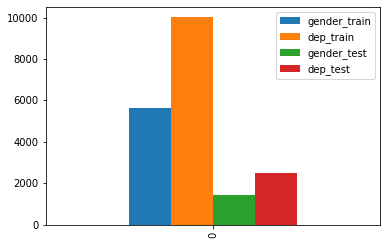

In [26]:
pd.DataFrame([data_plot]).plot.bar()

In [18]:
# ner = []
# sent = []
# for i in sentences:
#     if len(i) == 0:continue
#     words = i.split("\n")
#     nerx = [replaces[x.split()[-1]] for x in words]
#     sentx = [x.split()[0] for x in words]
#     ner.append(nerx)
#     sent.append(sentx)

In [19]:
text= " ".join(X_train[0])


In [20]:
fe = FeatureExtractor(dict_dir='resources/features')

In [25]:
fi = []
for text, ne in zip(X_train,y_train):
    fi.append(fe.extract_feature(text, ner_labels=ne, is_segmentation=True, format='text'))# + "\n"

In [22]:
# ne

In [23]:
# # fi = []
# for text, ne in zip(sent,ner):
#     fi.append(fe.extract_feature(text, ner_labels=ne, is_segmentation=True, format='text'))# + "\n"

In [26]:
with open("./dataset/train.csv","w+") as f:
    for i in range(len(fi)):
        f.write("\n".join(fi[i]))
        f.write("\n\n")

In [21]:
# fi[0]
    
VLSP_2016='/home/tuenguyen/Desktop/24mar2021/task_nlp/join_task_gender_department/dataset/vlsp_2016/test.txt'
VIN_AI='/home/tuenguyen/Desktop/24mar2021/task_nlp/join_task_gender_department/dataset/vinai/word/test_word.conll'
with open(VIN_AI,"r") as f:
    sentences=  f.read().split("\n\n")
with open(VLSP_2016,"r") as f:
    sentences.extend(f.read().split("\n\n"))
ner = []
sent = []
for i in sentences:
    if len(i) == 0:continue
    words = i.split("\n")
#     print(words)
#     for x in words:
#         print(x)
    nerx = [replaces[x.split()[-1]] for x in words]
    sentx = [x.split()[0] for x in words]
    for ix in range(len(sentx)):
        if 'chồng' == sentx[ix].strip():
            if 'GENDER' not in nerx[ix]:nerx[ix]='B-GENDER'
        if 'vợ' == sentx[ix].strip():
            if 'GENDER' not in nerx[ix]:nerx[ix]='B-GENDER'
        if 'ông' == sentx[ix].strip():
            if 'GENDER' not in nerx[ix]:nerx[ix]='B-GENDER'
        if 'mẹ' == sentx[ix].strip():
            if 'GENDER' not in nerx[ix]:nerx[ix]='B-GENDER'
        if 'bố' == sentx[ix].strip():
            if 'GENDER' not in nerx[ix]:nerx[ix]='B-GENDER'
    ner.append(nerx)
    sent.append(sentx)
fi = []
for text, ne in zip(sent,ner):
    fi.append(fe.extract_feature(text, ner_labels=ne, is_segmentation=True, format='text'))# + "\n"
with open("./dataset/test.csv","w+") as f:
    for i in range(len(fi)):
        f.write("\n".join(fi[i]))
        f.write("\n\n")

In [162]:
import csv
with open('./dataset/test.csv', "r", encoding="utf-8") as f:
    reader = csv.reader(f, delimiter="\t")
    eid = 0
    words = []
    feats = []
    labels = []
    examples = []
#     print(len(list(reader)))
    for line in reader:
#         print(len(line))
        if len(line) >= 2:
            words.append(line[0].strip())
            labels.append(line[-1].strip())
            if True:
                feat = []
                for item in line[1:-1]:
                    k, v = item.split("]")
                    feat.append((f"{k}]", v))
                feats.append(feat)
        else:
            examples.append((eid, words, labels, feats))
            words = []
            feats = []
            labels = []
            eid += 1
#     return examples

In [163]:
eid

4182

In [19]:
feats

[]

In [20]:
eid

2592

In [21]:
examples[12]

(12,
 ['Cả',
  'hai',
  'đều',
  'thuộc',
  'diện',
  'xét_nghiệm',
  'sàng_lọc',
  ',',
  'lấy',
  'mẫu',
  'bệnh_phẩm',
  'ngày',
  '11/4',
  ',',
  'kết_quả',
  'dương_tính',
  'ngày',
  '13/4',
  ',',
  'điều_trị',
  'tại',
  'Bệnh_viện',
  'Bệnh',
  'Nhiệt_đới',
  'Trung_ương',
  'cơ_sở',
  '2',
  '.'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-LOC',
  'I-LOC',
  'I-LOC',
  'I-LOC',
  'I-LOC',
  'I-LOC',
  'O'],
 [[('[Case]', 'I_Cap'),
   ('[SC]', 'N_Cap'),
   ('[FW]', '1'),
   ('[QB]', '0'),
   ('[Num]', '0'),
   ('[LOC]', '1'),
   ('[ORG]', '0'),
   ('[PER]', '0'),
   ('[PPOS]', '0')],
  [('[Case]', 'N_Cap'),
   ('[SC]', 'Pre_Cap'),
   ('[FW]', '0'),
   ('[QB]', '0'),
   ('[Num]', '1'),
   ('[LOC]', '0'),
   ('[ORG]', '0'),
   ('[PER]', '0'),
   ('[PPOS]', '0')],
  [('[Case]', 'N_Cap'),
   ('[SC]', 'N_Cap'),
   ('[FW]', '0'),
   ('[QB]', '0'),
   ('[Num]', '0'),
   ('[LO

In [119]:
import torch
from transformers import AutoModel, AutoTokenizer
# For transformers v4.x+: 
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)

Special tokens have been added in the vocabulary, make sure the associated word embedding are fine-tuned or trained.


In [120]:
processor = NERProcessor("./dataset", tokenizer)
processor.labels=["O",'B-GENDER','I-GENDER','B-LOC','I-LOC']
processor.label_map= {label: i for i, label in enumerate(processor.labels, 1)}
a = processor.get_example("train",use_feats=True)
fe = Feature("/home/tuenguyen/Desktop/24mar2021/task_nlp/join_task_gender_department/resources/features/feature_config.json")
# fe.special_token['[CLS]'] = fe.special_token['[CLS]'][1:]
features = processor.convert_examples_to_features(a, 126,fe)
print(features)

  3%|▎         | 254/8703 [00:00<00:06, 1300.22it/s]

*** Example ***
guid: 0
tokens: Đó là con đường biển ngắn nhất để đi từ Ấn sang Thái , chiếm đến lượng hàng lưu đường của thế , đó là hải lớn nhất từ tây sang đông với 50.000 lượt tàu qua mỗi năm ...
input_ids: 3 669 8 73 109 262 1131 67 24 57 39 8978 295 1709 4 724 30 525 119 3230 109 7 570 4 37 8 10317 103 67 39 2615 295 553 15 3976 1030 356 89 205 29 135 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
attention_masks: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
valid_mask: 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

  7%|▋         | 614/8703 [00:00<00:08, 988.47it/s] 


KeyboardInterrupt: 

In [66]:
processor.label_map

{'O': 1, 'B-GENDER': 2, 'I-GENDER': 3, 'B-LOC': 4, 'I-LOC': 5}

In [67]:
# fe.feature_infos["[PPOS]"]['label'].index("0")

In [68]:
fe.special_token['[CLS]'] 

[['[POS]', 'CH'],
 ['[Case]', 'A_Cap'],
 ['[SC]', 'Pos_Cap'],
 ['[FW]', '0'],
 ['[QB]', '0'],
 ['[Num]', '0'],
 ['[LOC]', '0'],
 ['[ORG]', '0'],
 ['[PER]', '0'],
 ['[PPOS]', '0']]

In [69]:
# a[0]

In [70]:
a[0][1],a[0][1][0].lower()

(['Đồng_thời',
  ',',
  'bệnh_viện',
  'tiếp_tục',
  'thực_hiện',
  'các',
  'biện_pháp',
  'phòng_chống',
  'dịch_bệnh',
  'COVID',
  '-',
  '19',
  'theo',
  'hướng_dẫn',
  'của',
  'Bộ',
  'Y_tế',
  '.'],
 'đồng_thời')

In [71]:
tokenizer.tokenize(a[0][1][0])

['Đồng_thời']

In [72]:
fex=features[12]

In [73]:
fex.__dict__.keys()

dict_keys(['eid', 'tokens', 'token_ids', 'token_masks', 'segment_ids', 'label_ids', 'label_masks', 'attention_masks', 'feats'])

In [74]:
fex.tokens

['Cả',
 'hai',
 'đều',
 'thuộc',
 'diện',
 'xét_nghiệm',
 'sàng_lọc',
 ',',
 'lấy',
 'mẫu',
 'bệnh_phẩm',
 'ngày',
 '11/4',
 ',',
 'kết_quả',
 'dương_tính',
 'ngày',
 '13/4',
 ',',
 'điều_trị',
 'tại',
 'Bệnh_viện',
 'Bệnh',
 'Nhiệt_đới',
 'Trung_ương',
 'cơ_sở',
 '2',
 '.']

In [75]:
fex.label_ids

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 5,
 5,
 5,
 5,
 5,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]